# XGBoost

In [1]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/breast_cancer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/breast_cancer.parquet')

In [5]:
y_train = train.diagnosis
X_train = train.drop(columns=['diagnosis'])

In [6]:
y_validation = validation.diagnosis
X_validation = validation.drop(columns=['diagnosis'])

In [8]:
exploratory_depths =[2, 3, 4, 5]
exploratory_estimators = [50, 100, 200, 300]
exploratory_learn_rate = [0.05, 0.1, 0.2, 0.5]

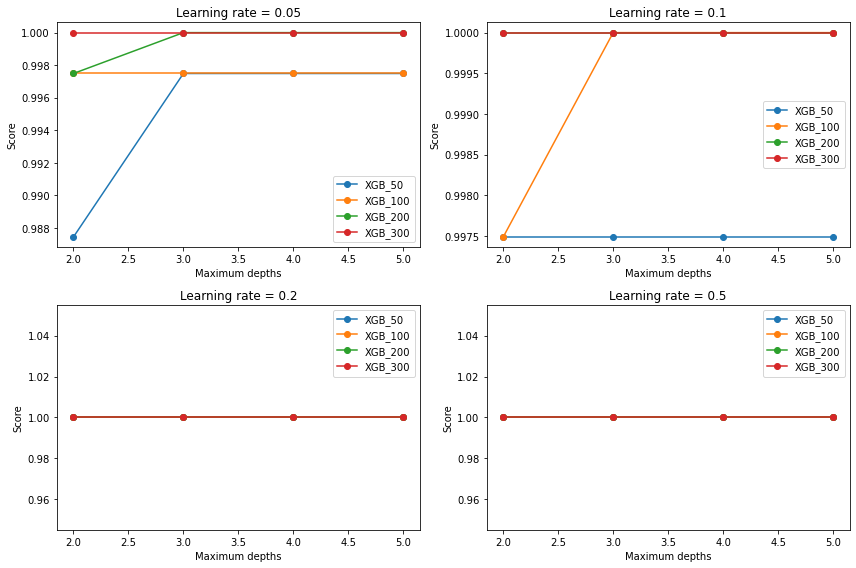

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 0].set_xlabel('Maximum depths')
axs[0, 0].set_ylabel('Score')
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[0, 1].set_xlabel('Maximum depths')
axs[0, 1].set_ylabel('Score')
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 0].set_xlabel('Maximum depths')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()
axs[1, 1].set_xlabel('Maximum depths')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [10]:
max_depth = [1, 2, 3]
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200, 250, 300]
learn_rate = [0.01, 0.05, 0.1, 0.2]

In [12]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(XGBClassifier(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('XGB_'+str(n)+'_'+str(d)+'_'+str(l))

In [13]:
metrics = classification(models_list, names_list, '../../../data/metrics/breast_cancer/xgboost.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
XGB_10_1_0.01,0.037899,0.982483,0.943296,-3.988583
XGB_10_1_0.05,0.016954,0.990506,0.942982,-4.797905
XGB_10_1_0.1,0.015957,0.991094,0.943609,-4.791202
XGB_10_1_0.2,0.014961,0.992030,0.959586,-3.270456
XGB_10_2_0.01,0.017952,0.990172,0.941416,-4.923960
...,...,...,...,...
XGB_300_2_0.2,0.169057,1.000000,0.986842,-1.315789
XGB_300_3_0.01,0.306198,0.999652,0.947995,-5.167531
XGB_300_3_0.05,0.202969,1.000000,0.983709,-1.629073
XGB_300_3_0.1,0.180026,1.000000,0.983083,-1.691729


In [15]:
metrics.sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
XGB_50_2_0.2,0.033987,1.000000,0.989975,-1.002506
XGB_150_1_0.2,0.061836,1.000000,0.989975,-1.002506
XGB_75_2_0.2,0.041887,1.000000,0.988722,-1.127820
XGB_100_2_0.1,0.058843,1.000000,0.988722,-1.127820
XGB_75_3_0.1,0.052859,1.000000,0.988095,-1.190476
...,...,...,...,...
XGB_75_1_0.01,0.045984,0.991429,0.942669,-4.918102
XGB_50_1_0.01,0.031985,0.990279,0.942669,-4.807687
XGB_125_1_0.01,0.056848,0.992164,0.942669,-4.988583
XGB_25_2_0.01,0.024969,0.990145,0.942043,-4.858111


The best model is **XGB_50_2_0.2**, formed by 50 trees of maximum depth 2 and learning rate 0.2

In [16]:
test = pd.read_parquet('../../../data/model_input/test_sets/breast_cancer.parquet')

In [17]:
y_test = test.diagnosis
X_test = test.drop(columns=['diagnosis'])

In [18]:
retrain = pd.concat([train, validation])

In [19]:
y_retrain = retrain.diagnosis
X_retrain = retrain.drop(columns=['diagnosis'])

In [20]:
model = XGBClassifier(n_estimators=50, max_depth=2, learning_rate=0.2).fit(X_retrain, y_retrain)

In [21]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9861


In [22]:
dump(model, 'best_xgboost.joblib')

['best_xgboost.joblib']

In [23]:
with open('../../../data/metrics/breast_cancer/final_AUC.txt', 'a') as f:
    f.write('\nXGB, '+ str(auc))